In [3]:
# 只用tensro和autograd实现线性回归
import torch as t
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = t.randn(num_examples, num_inputs, dtype=t.float32)
labels = true_w[0]*features[:, 0]+true_w[1]*features[:, 1]+true_b
labels+= t.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=t.float32)

print(features[0], labels[0])



tensor([0.9862, 1.2527]) tensor(1.9251)


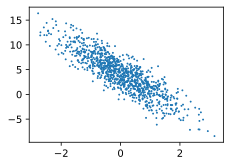

In [5]:
# 生成矢量图观察第二个特征与标签的关系
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)


In [6]:
# 读取数据
def data_iter(batch_size, features, labels):
    num_examples=len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = t.LongTensor(indices[i:min(i+batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)
        
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


tensor([[ 0.5873,  0.6468],
        [-0.7709, -0.5917],
        [ 1.0640,  0.3461],
        [ 0.7965, -0.7094],
        [-0.0445, -2.0717],
        [-0.3904, -0.5891],
        [-1.2623,  0.7457],
        [ 0.6721,  1.2237],
        [ 0.8088,  0.7088],
        [ 0.1657, -0.7812]]) tensor([ 3.1734,  4.6777,  5.1436,  8.2198, 11.1545,  5.4105, -0.8658,  1.3707,
         3.4058,  7.1992])


In [7]:
w = t.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=t.float32, requires_grad=True)
b = t.zeros(1, dtype=t.float32, requires_grad=True)

# 定义模型
def linreg(X, w, b):
    return t.mm(X, w)+b

# 损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) **2/2

# 优化算法
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size


In [8]:
# 训练模型
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    # 在每个迭代周期中，训练数据集中所有样本一次
    for X , y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        
        # 每次更新梯度后，要清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    train_l = loss(net(features, w, b), labels)
    print("epoch %d, loss : %f"  %(epoch+1, train_l.mean().item()))
    
print(true_w, " \n", w )
print(true_b, "\n", b)

epoch 1, loss : 0.040251
epoch 2, loss : 0.000150
epoch 3, loss : 0.000052
[2, -3.4]  
 tensor([[ 2.0004],
        [-3.3999]], requires_grad=True)
4.2 
 tensor([4.1995], requires_grad=True)
